In [2]:
import numpy as np
import random
import cv2
from matplotlib import pyplot as plt #for all ur plotting needs

In [3]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

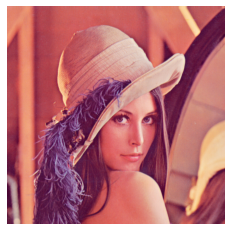

In [7]:
image_color = cv2.imread('/lenna.png') 
plt.axis("off")
plt.imshow(cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB))


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


(512, 512)


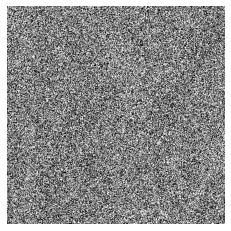

In [33]:
image = cv2.imread('/lenna.png',0) # Only for grayscale image
noise_img = sp_noise(image,0.45)
plt.axis("off")
plt.imshow(noise_img,cmap='gray')
print(noise_img.shape)

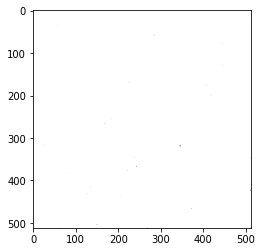

In [14]:
M = np.array([[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1],[1,1,1,1,1]])
M=M/sum(M)
clean_image=cv2.filter2D(noise_img, -1, M)
plt.imshow(clean_image,cmap='gray')

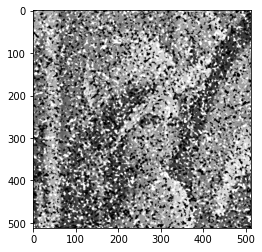

In [15]:
clean_image=cv2.medianBlur(noise_img, 5)
plt.imshow(clean_image,cmap='gray')

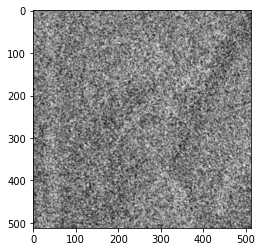

In [16]:
clean_image=cv2.GaussianBlur(noise_img, (5,5),0)
plt.imshow(clean_image,cmap='gray')

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


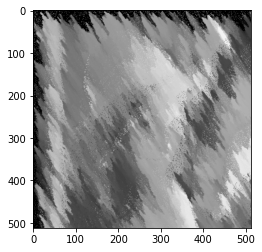

In [34]:
def clean_image (img_in):
  img=img_in.copy()
  for i in range (0,img.shape[0]):
    for j in range (0, img.shape[1]):
      if img[i,j]==255:
        img[i,j]=np.median(img[i-2:i+2,j-2:j+2],axis=None)
      if img[i,j]==0 :
        img[i,j]=np.median(img[i-2:i+2,j-2:j+2],axis=None)
  return img

noiseless_imager=clean_image(noise_img)
plt.imshow(noiseless_imager,cmap='gray')